# Lab Assignment 3 -- Control Flow & Functions
In this lab, you will complete a series of exercises related to the lecture material on control flow and functions.

## Exercise 1a -- Divisible by n
Define a function called `divisible_by_n()` that takes two inputs:
- a range
- a single integer (the n)

By default, the single integer argument should be equal to 2 if only one argument is provided.

You function should return a list of all numbers in the input range that are divisible by `n`.

Include a function description for your function using docstrings.

**Hints**
- You can use `%` (for modular arithmetic) or you can use `math.round()` to check if a number is divisible by 3.
- Think about whether you should to use a `for` loop or a `while` loop.

In [1]:
# Exercise 1a

def divisible_by_n(num_range, n = 2):
  """
  Returns a list of numbers from the input range that are divisible by n.

  Parameters:
  num_range: A range of numbers to check for divisibility.
  n: The divisor. Default is 2.

  Returns:
  divis_list: A list of numbers from num_range that are divisible by n.
  """

  divis_list = [] # initialize an empty list to store numbers divisible by n
  for num in num_range: # iterate over each number in the given range
    if num % n == 0:  # check if the current number is divisible by n
      divis_list.append(num) # if divisible, append the number to the list

  return divis_list # return the list of numbers that are divisible by n

In [2]:
print(divisible_by_n(range(20)))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## Exercise 1b -- Big Lists
`%timeit` in the code below is what is known as an IPython magic function. IPython stands for Interactive Python and simply refers to a version of the Python (and other coding languages) environment that has more functionality than the standard one. In particular, this functionality makes Python easier to interact with if we want to explore data, test functions, etc. Jupyter is built on IPython.

`%timeit` runs the code that follows it many times to get a sense of how long the code takes to run. Below, we use it to time how long `divide_by_n` takes on two ranges of different lengths.

Run the cell and answer the following questions in a Markdown cell:
1. Which range takes longer to get through? By how many times longer does it take? Does this make sense to you? What does it say about how the time of computation is affected by the length of the range?
2. Would your function work with a list instead of a range? Why or why not?

**Hint:** $\mu s$ means microseconds

In [3]:
# Exercise 1b -- don't edit this cell

# Measure the execution time of the divisible_by_n function
%timeit divisible_by_n(range(1_001), 3)
%timeit divisible_by_n(range(10_001), 3)

111 µs ± 27.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
The slowest run took 5.19 times longer than the fastest. This could mean that an intermediate result is being cached.
1.58 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
# Ratio comparison
mean_range_1k = int(111)
mean_range_10k = int(1.58 * 1000)
print(f"1 : {round(mean_range_10k / mean_range_1k, 1)}")

1 : 14.2


### Response to 1b
Zachary:

Q1. The second range takes longer to get through. Dividing the mean of the second result by the mean of the first result, it takes about 14 times longer. Yes it makes sense to me that a larger range (1 to 10,000 vs 1 to 1,000) would require more time to get through (due to having more elements). I'd say that computation time increases at about the same rate as (linearly or proportionally) the length of the range increases. In the above cell, the second range is 10 times as large as the first range and took about 14 times longer to compute.

Q2. Yes the function works with a list. Both list and range are iterable.

## Exercise 2 -- Function Objects vs. Function Calls
`sum()` is a function that can take some iterables and return the sum of elements in that iterable. In the Markdown cell below, answer the following questions.
1. What types is `sum`?
2. What type is `sum([1,2,3])`? How about `sum([1,2.0,3])`?
3. Are the types of these three objects the same or different? Why?
4. What is the type of `print("hello")`? Why?


In [5]:
# If needed, you can call the type function on these objects to help answer the question
print(type(sum))

print(sum([1,2,3]))
print(type(sum([1,2,3])))

print(sum([1,2.0,3]))
print(type(sum([1,2.0,3])))

print("hello")
print()
print(print("hello"))
print(type(print("hello")))

<class 'builtin_function_or_method'>
6
<class 'int'>
6.0
<class 'float'>
hello

hello
None
hello
<class 'NoneType'>


### Reponse to Exercise 2
Zachary:

Q1. It is a built-in function.

Q2. They are integer and float types respectively.

Q3. They are different types. The first object is the sum function but it is not being applied to anything. The second object is the sum function applied on a list of integers - an integer value 6 is returned. The third object is the sum function applied on a list of 2 integers and 1 float - a float value 6.0 is returned.

Q4. It is a NoneType, meaning the object print("hello") has no value. This happens because the inner print statement executes and prints/outputs the string "hello" to the console, but itself does not have a value or returns the value None.

# Exercise 3
Exercise 3 is a series of six questions
## Exercise 3a -- Factorial Function
The factorial of an integer n (denoted n! in mathematics) is equal to itself multipled by all of the integers smaller than n. That is
$$
n! = n * (n-1) * (n-2) *...* 2 * 1
$$
where $0!$ is defined to be 1.

The module `math` already has a factorial function, but you are going to build your own. In the cell below, define a function called `custom_factorial` that takes an integer as an input and returns the factorial of that integer. You must use a loop to calculate the factorial.

In [6]:
# Exercise 3a Code

# Define function to calculate factorial. Initialize start to 1 since 0! == 1.
def custom_factorial(n):
    out = 1
    for num in range(1, n + 1): # loop from 1 to n to calculate factorial
        out = out * num # in each iteration, it multiplies the current value of out by the loop variable num

    return out # return computed factorial once loop ends

In [7]:
# Calculate the factorial of 5
custom_factorial(5)

120

## Exercise 3b -- Checking Your Work
Using the `math` module's `factorial` function and a comparison operator, check that your function works for 10!.


In [8]:
# Exercise 3b Code
import math
print(math.factorial(10))
print(custom_factorial(10))
math.factorial(10) == custom_factorial(10)

3628800
3628800


True

## Exercise 3c -- Nondecreasing Functions
A function $f$ is nondecreasing when $f(x) \geq f(y)$  if and only if $x \geq y$. Using `matplotlib.pyplot`, and your function plot the factorial function for $n = 0, 1, 2, 3, ..., 20$. You can plot a scatter plot or a line plot.

In the Markdown cell below, give another example of a nondecreasing function.

**Hint:** Use a a list comprehension.

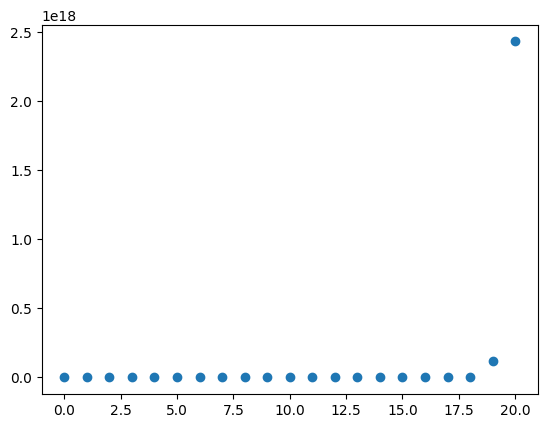

In [9]:
# Exercise 3c Code
import matplotlib.pyplot as plt

n_range = range(0, 20 + 1) # x coordinates
factorial_values = [custom_factorial(x) for x in n_range] # y coordinates

# Plot scatter graph
plt.scatter(n_range, factorial_values)

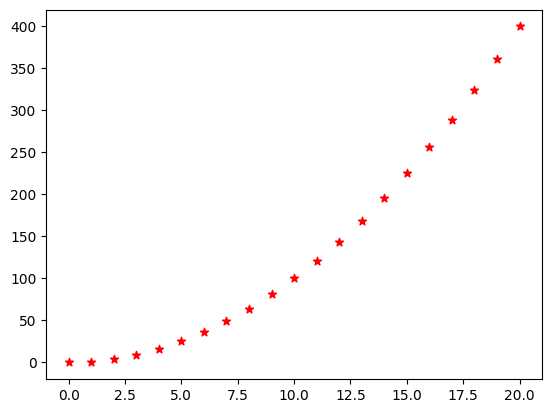

In [10]:
# Exercise 3c Part 2 Code
def square(n):
  return n ** 2

n_range = range(0, 20 + 1) # x coordinates
square_values = [square(x) for x in n_range] # y coordinates

# Plot scatter graph
plt.scatter(n_range, square_values, marker = '*', color = "red")

### Response to Exercise 3c
Zachary: Another nondecreasing function is square. Wrote the example and graph above.

## Exercise 3d -- Finding the Smallest Integer
For a generic nondecreasing function $f$, we might be interested in finding the smallest integer $n$ such that $f(n)$ is greater than or equal to some constant $c$. In the lecture we did this with $f(n) = n^2$, which is nondecreasing for $n \geq 0$, and $c = 12345$.

Now, define a function calld `find_smallest_int` that takes a starting value `start`, a function `f`, and a constant `c` as inputs. Recognizing that these correspond to the values above, have your function return two values: the smallest integer $n$ such that $f(n) \geq c$ and the value of $f(n)$ for that integer.

**Hint:** If you're stuck, try looking at the lecture.

In [11]:
# Exercise 3d Code
def find_smallest_int(start, f, c):
  '''
  Find the smallest integer greater than or equal to 'start' such that the result of applying function 'f' to it is at least 'c'.

  Parameters:
  start (int): The starting integer value.
  f (function): A function that takes an integer and returns a numerical value.
  c (number): The threshold value such that f(start) >= c.

  Returns:
  tuple: A tuple containing the smallest integer and the result of applying 'f' to it.
  '''

  while f(start) < c: # increment start by 1 until f(start) >= c
    start += 1

  return start, f(start) # return the smallest integer and the result of applying 'f' to it

In [12]:
find_smallest_int(10, lambda x: x** 2, 400)

(20, 400)

## Exercise 3e -- Plugging in Your Function
Now, use `find_smallest_int` and `custom_factorial` to find the smallest $n$ such that $n! \geq 12,345$. Use a starting value of 0. Check your answer as we did in the lecture.


In [13]:
# Exercise 3e Code
find_smallest_int(0, custom_factorial, 12345)

(8, 40320)

## Exercise 3f -- Increasing n
Now we wil time the speed and output of `find_smallest_int` with smaller and larger values of $c$ and two different functions: `custom_factorial` and and a lambda function that sqaures a single input.

Answer the folowing questions in the Markdown cell below:
1. Which function takes longer to run for a fixed value of $c$. Why do you think this is?
2. What is the ratio between runtimes when fixing the function and varying $c$ from 1,000 to 10,000. How about 10,000 to 100,000? Compare this ratio to the ratio of smallest integers for those runs. Are they similar? Why or why not?  You will want to write some code to compare these values.


In [14]:
# Exercise 1b -- don't edit this cell
%timeit find_smallest_int(0, custom_factorial, 1_000)
%timeit find_smallest_int(0, custom_factorial, 10_000)
%timeit find_smallest_int(0, custom_factorial, 100_000)



%timeit find_smallest_int(0, lambda x: x ** 2, 1_000)
%timeit find_smallest_int(0, lambda x: x ** 2, 10_000)
%timeit find_smallest_int(0, lambda x: x ** 2, 100_000)

4.22 µs ± 76.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.31 µs ± 946 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.26 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.1 µs ± 2.52 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
37.5 µs ± 442 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
135 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
# Compare ratios here

# Factorial function, ratio of c = 1,000 vs c = 10,000
mean_fn_c1k = 4.22
mean_fn_c10k = 5.31
print(f"1 : {round(mean_fn_c10k / mean_fn_c1k, 1)}")

# Factorial function, ratio of c = 10,000 vs c = 100,000
mean_fn_c10k = 5.31
mean_fn_c100k = 6.26
print(f"1 : {round(mean_fn_c100k / mean_fn_c10k, 1)}")

# X square function, ratio of c = 1,000 vs c = 10,000
mean_x2_c1k = 14.1
mean_x2_c10k = 37.5
print(f"1 : {round(mean_x2_c10k / mean_x2_c1k, 1)}")

# X square function, ratio of c = 10,000 vs c = 100,000
mean_x2_c10k = 37.5
mean_x2_c100k = 135
print(f"1 : {round(mean_x2_c100k / mean_x2_c10k, 1)}")

1 : 1.3
1 : 1.2
1 : 2.7
1 : 3.6


### Response to Exercise 3f
Zachary:

Q1. The lamba function that squares x takes longer to run for a fixed value of c. I cannot think of an explanation as it goes against my expectations. I expected that the finding the smallest integer for the factorial function would be longer as it is more complex.

Q2. The ratio between runtimes when fixing the function and varying c from 1,000 to 10,000 is 1 : 2.7. When varying c from 10,000 to 100,000, the ratio is 1: 3.6. They are somewhat similar.

When it comes to finding the smallest integer for the factorial function, the ratio between 1,000 and 10,000 is the same as the ratio between 10,000 and 100,000. This suggests runtime scales linearly.

For the lamba function that squares x, the ratio increases when varying c. This suggests that runtime scales at an increasing rate (not linearly), maybe exponentially.

## Exercise 4 -- Fibonacci Sequence
The Fibonacci Sequence is an infinite sequence of integers $X_0, X_1, X_2, X_3, ...$ defined as below

$$
X_0 = 0
$$
$$
X_1 = 1
$$
$$
\hspace{3.66cm}X_t = X_{t-1} + X_{t-2} \text{ for } t \geq 2
$$

Below define a function called `fibo_seq` that takes $t$ as an input and returns $X_t$, the $t$-th element of the Fibonacci Sequence.


In [18]:
## Exercise 4 Code
def fibo_seq(t):
  '''
  This is a Fibonacci Sequence function that calculates a number as the sum of the two preceding ones.
  '''
  x = 0
  if t == 0:
    return 0
  if t == 1:
    return 1
  xtm2 = 0
  xtm1 = 1
  for t in range(2, t+1):
    x = xtm1 + xtm2
    xtm2 = xtm1
    xtm1 = x

  return x

In [19]:
print(fibo_seq(10))
print(fibo_seq(11))
print(fibo_seq(12))
fibo_seq(10) + fibo_seq(11) == fibo_seq(12)

55
89
144


True

## Exercise 5 -- Palindrome Detector
A palindrome is a word or phrase that is spelled the same backwards as it is forwards (ignoring spaces). Create a function called `is_palindrome` that takes a list of strings and returns a list of Boolean variables that indicate whether the respective string is a palindrome or not. **Ignore capitalization and spaces**.

When you're ready, test your function out on the cell below where `palindromes` and `nonpalindromes` are defined. Your function should return `[True, True, True, True, True]` for the former and `[False, False, False]` for the latter.


**Hints**
- A method will help you get rid of the white space
- Look up on Google how to reverse a string as the reverse method only exists for lists

In [20]:
# Exercise 5 -- create is_palindrome function here
# Apply the palindrome check to each word in the list. Remove capitalization with lower() and spaces with replace(). Reverse the word by slicing with [::-1].
def is_palindrome(words):
  return [word.lower().replace(" ", "") == word.lower().replace(" ", "")[::-1]
        for word in words]

In [21]:
# Run this cell when you're ready -- do not edit it
palindromes = ["Radar", "Taco cat", "Stressed Desserts", "no Lemon no melon", "!??!!??!"]
nonpalindromes = ["Hello World", "VSP", "Vancouver Canada"]

print(is_palindrome(palindromes))
is_palindrome(nonpalindromes)

[True, True, True, True, True]


[False, False, False]

## Exercise 6 -- Comparison Operators & List Comprehensions
Using `num_list` and list comprehensions, create three lists that correspond to the elements in num_list:
1. `equal_list` whose elements should be true if the corresponding element in `num_list` is equal to 0 and false otherwise.
2. `greater_list` whose elements should be true if the corresponding element in `num_list` is strictly greater than 0 and false otherwise.
3. `lesser_list` whose elements should be true if the corresponding element in `num_list` is strictly less than 0 and false otherwise.
4. Finally, using the three lists you generated, list comprehensions, and `zip()`, create `true_list` a list of length 7 where every element is true.

**Hints for 4:**
- `zip` can be used on more than two lists
- use `or` within the list comprehension

In [22]:
# Exercise 6 Code
# Don't edit the line below
num_list = [-5, -3, -1, 0, 1, 3, 5]

# your code below here
equal_list = [num == 0 for num in num_list] # check that number is exactly zero and iterate for all elements in num_list using for loop
print(equal_list)

greater_list = [num > 0 for num in num_list] # check that number is more than zero and iterate for all elements in num_list using for loop
print(greater_list)

lesser_list = [num < 0 for num in num_list] # check that number is less than zero and iterate for all elements in num_list using for loop
print(lesser_list)

true_list = [any(x) for x in zip(lesser_list, equal_list, greater_list)] # any() returns True if item elements in the 3 lists are True
print(true_list)

[False, False, False, True, False, False, False]
[False, False, False, False, True, True, True]
[True, True, True, False, False, False, False]
[True, True, True, True, True, True, True]


## Exercise 7 -- List Comprehensions and Very Basic Plotting
Complete the following steps in the cells below:
1. Import the `math` module and give it an alias of `mt`.
2. Import the `matplotlib.pyplot` module and give it an alias of `plt`.
3. Create a variable named `num_range` and set it equal to a range of numbers from 0 to 1000 (including 1000).
4. Using `num_range` and a list comprehension, create a list called `sine_list` that is equal to `sin((pi/100) * x)` for every `x` in the range `num_range`. (**Hint:** sin and pi are objects from the math library.)
5. Finally, using `plt`, `num_range`, and `sine_list`, generate a line plot.

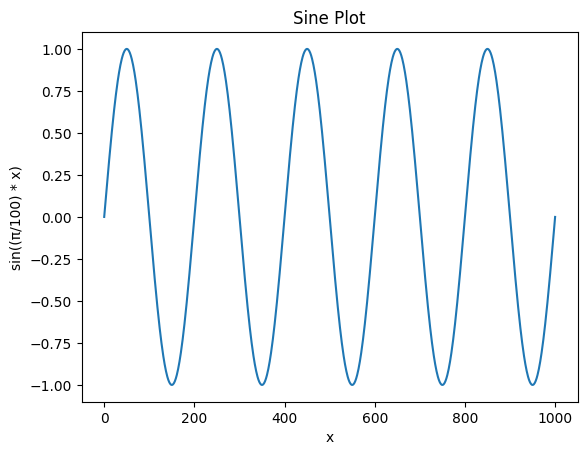

In [23]:
# Exercise 7 Code

# Import required modules
import math as mt
import matplotlib.pyplot as plt

num_range = range(1_001)
sine_list = [mt.sin((mt.pi/100) * x) for x in num_range]

# Plot x and y axis with num_range and sine_list
plt.plot(num_range, sine_list)

# Add title and labels
plt.title("Sine Plot")
plt.xlabel("x")
plt.ylabel("sin((π/100) * x)")

# Display all plots
plt.show()